In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mbel = pd.read_csv('merged_mbel_with_mean.tsv', sep='\t', index_col=0)
mbel = mbel.replace('no_overlap_bin', np.nan)

/scratch/ipykernel_15573/1256894370.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  mbel = pd.read_csv('merged_mbel_with_mean.tsv', sep='\t', index_col=0)


In [3]:
mbel_exon_oe = mbel.loc[mbel.featuretype=='exon'].groupby('GeneID')[['gene_cpg_o', 'gene_cpg_e']].sum()
mbel_exon_oe['mean_exon_oe'] =mbel_exon_oe.gene_cpg_o/mbel_exon_oe.gene_cpg_e

In [4]:
mbel_intron_oe = mbel.loc[mbel.featuretype=='intron'].groupby('GeneID')[['gene_cpg_o', 'gene_cpg_e']].sum()
mbel_intron_oe['mean_intron_oe'] =mbel_intron_oe.gene_cpg_o/mbel_intron_oe.gene_cpg_e

In [5]:
mbel_gene = mbel.loc[mbel.featuretype=='gene']

In [6]:
mbel_gx = pd.merge(mbel_gene,mbel_exon_oe['mean_exon_oe'], left_on='GeneID', right_index=True)

In [7]:
mbel_gxi = pd.merge(mbel_gx,mbel_intron_oe['mean_intron_oe'], left_on='GeneID', right_index=True)

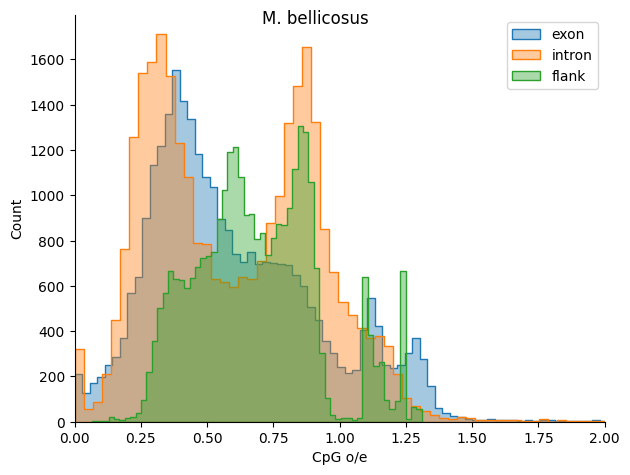

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1)
sns.histplot(mbel_gxi.mean_exon_oe, ax=ax,element="step", alpha=0.4, label='exon')
sns.histplot(mbel_gxi.mean_intron_oe, ax=ax,element="step", alpha=0.4, label='intron')
sns.histplot(mbel_gxi.mean_cpg_flank, ax=ax,element="step", alpha=0.4, label='flank')
ax.set_xlim(0,2.0)
ax.set_xlabel('CpG o/e')
plt.legend()
sns.despine()
plt.tight_layout()
fig.suptitle('M. bellicosus')
plt.show()

In [9]:
mbgxi_melt = mbel_gxi.melt(id_vars=['featuretype', 'GeneID', 'scaffold'], value_vars=[ 'mean_cpg_flank', 'mean_exon_oe', 'mean_intron_oe'], )

(0.0, 1.7)

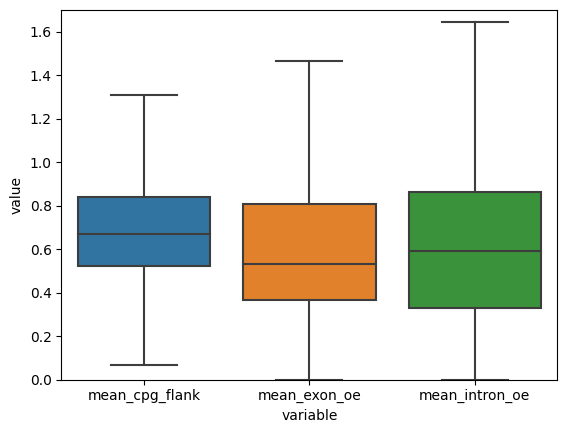

In [10]:
sns.boxplot(data=mbgxi_melt, x='variable', y='value', fliersize=0)
plt.ylim(0,1.70)

In [11]:
mbel['featurelength'] = mbel.End_pos - mbel.Start_pos

In [ ]:
mbel['m_l'] = mbel.weighted_mean_rho_gene.astype(float)*mbel.featurelength.astype(float)

In [12]:
def get_mean_rho(df, gene):
    df = df.loc[df.GeneID==gene]
    m_l = df.weighted_mean_rho_gene.astype(float)*df.featurelength.astype(float)
    return np.sum(m_l)/df.featurelength.sum()
    

In [13]:
exon_weighted_mean_rho = []
for i in mbel_gxi.GeneID:
    
    val = get_mean_rho(df=mbel.loc[mbel.featuretype=='exon'],gene=i)
    exon_weighted_mean_rho.append([i, val])

In [ ]:
csec = pd.read_csv('merged_csec_with_mean.tsv', sep='\t', index_col=0)

In [14]:
exon_weighted_mean_rho[0:5]

[['g5794.t1', 4.976594412878788],
 ['g5795.t1', 1.26939],
 ['g5796.t1', 35.130989083155654],
 ['g5797.t1', 40.9623136754386],
 ['g5798.t1', 42.311748369565215]]

In [16]:
pd.DataFrame(exon_weighted_mean_rho).to_csv('mbel_weighted_mean.tsv', sep='\t')

In [ ]:
intron_weighted_mean_rho = []
for i in mbel_gxi.GeneID:
    
    val = get_mean_rho(df=mbel.loc[mbel.featuretype=='intron'],gene=i)
    intron_weighted_mean_rho.append([i, val])